Content:
    1. Simple K-Means Cluster on 2D data
    2. General K-Means Cluster works with data of any dimension
    3. Simple Image Compression (Don't use large image file)
    4. Optimized Image Compression
    5. Using SkLearn (Always use library)

In [28]:
import random
import math
from tqdm import tnrange, tqdm_notebook
from matplotlib import pyplot
from pprint import pprint
from functools import lru_cache

def vector_addiction(vector1, vector2):
    return [i+j for i,j in zip(vector1, vector2)]

def scalar_multiplication(vector, scalar):
    return [scalar*i for i in vector]

def index_where_equals(vector, value):
    return [i for i in range(len(vector)) if vector[i] == value]

def random_list(no,minimum=0,maximum=100):
    return [random.randint(minimum, maximum) for i in range(no)]

def euclidian_distance(vector1, vector2):
    temp = sum([(i-j)**2 for i,j in zip(vector1,vector2)])
    return math.sqrt(temp)

def get_column(matrix, column):
    return list(map(lambda x: x[column], matrix))

# K-Means Clustering

In [29]:
class KMeans:
    def __init__(self,no_of_clusters = 2):
        self.no_of_clusters = no_of_clusters
    
    def initial_cluster_center(self):
        cluster_center = []
        for b in range(self.no_of_clusters):
            temp = []
            for i, j in zip(self.min_values,self.max_values):
                temp.append(random.randint(i, j))
            cluster_center.append(temp)
        return cluster_center
        
    def fit(self,X,iterations=5):
        self.X = X
        
        self.transpose = [self.get_column(X,i) for i in range(len(X[0]))]
        
        self.min_values, self.max_values = [min(i) for i in X], [max(i) for i in X]

        self.no_of_dimension = len(X)
        can_visualise = True if self.no_of_dimension == 2 else False
        self.cluster_center = self.initial_cluster_center()

        for i in tqdm_notebook(range(iterations)):
            self.assign_cluster()

            self.relocate_clusters()
            
        self.assign_cluster()
        if not can_visualise:
            print('Can only visualise 2d data')

            
    def nearest_cluster(self,point):
        min_cluster = None
        min_distance = None
        
        for i in range(len(self.cluster_center)):
            #cluster_x, cluster_y = self.cluster_center[i]
            
            distance = euclidian_distance(self.cluster_center[i], point)
            
            if not min_distance or min_distance > distance:
                min_distance = distance
                min_cluster = i
        
        return min_cluster
    
    def get_column(self,matrix, column):
        return list(map(lambda x: x[column], matrix))
    
    def assign_cluster(self):
        self.cluster_assignment = []
        
        for i in range(len(self.X[0])):
            
            point = self.get_column(self.X,i)
            
            self.cluster_assignment.append(self.nearest_cluster(point))
        
        return self.cluster_assignment
    
    def relocate_clusters(self):
        temp = {}
        
        no_of_points_in_cluster = {}
        
        for cluster_no,vector2 in zip(self.cluster_assignment,self.transpose):
            temp.setdefault(cluster_no,[0 for i in range(self.no_of_dimension)])
            temp[cluster_no] = vector_addiction(temp[cluster_no],vector2)
            
            no_of_points_in_cluster.setdefault(cluster_no, 0)
            no_of_points_in_cluster[cluster_no] += 1
        
        for key, value in temp.items():
            self.cluster_center[key] = scalar_multiplication(value, 1/no_of_points_in_cluster[key])
        
        return self.cluster_center
    
    def visualize(self, save_name = None):
        
        if self.no_of_dimension !=2:
            print('Can only visualise 2')
            return
        graph = pyplot
        graph.clf()
        cluster_x = [i[0] for i in self.cluster_center]
        cluster_y = [i[1] for i in self.cluster_center]
        
        colors = ['r', 'b', 'g', 'k', 'm']
        markers = ['P','v','*','s','X']

        for i in range(len(self.cluster_center)):
            point_no = index_where_equals(self.cluster_assignment,i)
            
            x = [self.X[0][i] for i in point_no]
            y = [self.X[1][i] for i in point_no]
            graph.scatter(x, y, c= colors[i])

            graph.scatter([cluster_x[i]], [cluster_y[i]],c=colors[i], marker = markers[i])
        
        
        if save_name:
            graph.title = save_name
            graph.savefig('/Users/ankushchoubey/Desktop/'+str(save_name) +'.png')

In [30]:
no_of_points = 100
x = random_list(no_of_points,0,40)
y = random_list(no_of_points,0,40)

In [31]:
# check it step by step
engine_general = KMeans(5)

engine_general.fit([x,y],10)
engine_general.cluster_assignment
pprint(engine_general.cluster_center)
#print(engine_general.nearest_cluster([1,2]))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))


[[27.428571428571427, 32.238095238095234],
 [8.529411764705882, 32.588235294117645],
 [6.916666666666666, 12.125],
 [24.133333333333333, 4.6],
 [34.69565217391304, 13.739130434782608]]


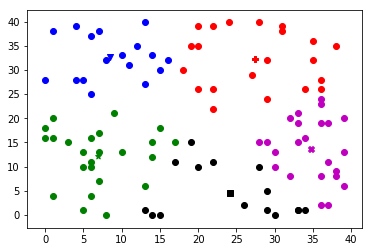

In [32]:
engine_general.visualize()

# 3. Simple Image Compression (Don't use large image file)

In [33]:
no_of_colors = 16

In [34]:
from PIL import Image

In [36]:
image_large = Image.open('/Users/ankushchoubey/Downloads/1.jpg')
#image.show()
#image_small = Image.open('/Users/ankushchoubey/Downloads/small.jpg')

# 4. Optimized Image Compression

In [40]:
def min_max_scaling(x, x_min, x_max,new_x_min,new_x_max):
    return (x - x_min)*(new_x_max-new_x_min)/(x_max-x_min) + new_x_min
@lru_cache(maxsize=256)
def scale8_bit(no):
    return int((no*6/256)*36)

In [41]:
class ImageCompress:
    @lru_cache()
    def min_max_scaling(self,x):
        return (x - self.mini)*self.product_factor + self.range_start
    @lru_cache(maxsize=520800)
    def nearest_color(self, r,g,b):
        cluster_at_index = self.kmeans.nearest_cluster([r,g,b])
        cluster_point = self.kmeans.cluster_center[cluster_at_index]
        return tuple([int(i) for i in cluster_point])
    def fit(self, image,no_of_colors,iterations, quality=0.1):
        width, height = image.size
        colors = image.getcolors(width*height)
        
        no = get_column(colors,0)
        scaled_version = []
        
        self.mini = min(no)
        self.maxi = max(no)
        
        self.range_start = 0
        self.range_end = self.maxi*quality
        
        self.product_factor = (self.range_end-self.range_start)/(self.maxi-self.mini)
        
        for i in tqdm_notebook(no, desc='Scaling Values'):
             scaled_version.append(int(self.min_max_scaling(i)))

        self.min_max_scaling.cache_clear()
        x_l,y_l,z_l=[],[],[]
        for i in tqdm_notebook(range(len(scaled_version)), desc='getting image data'):
            if scaled_version[i]==0:
                continue
            
            for j in range(scaled_version[i]):
                x,y,z = colors[i][1]
                #x, y,z = scale8_bit(x), scale8_bit(y),scale8_bit(z)
                x_l.append(x)
                y_l.append(y)
                z_l.append(z)
                
        self.kmeans = KMeans(no_of_colors)
        self.kmeans.fit([x_l,y_l,z_l],iterations=iterations)
        del x_l, y_l, z_l
        new_pixel_values=[]
        
        for i in tqdm_notebook(list(image.getdata())):
            change_color = self.nearest_color(i[0],i[1],i[2])
            new_pixel_values.append(change_color)
        self.nearest_color.cache_clear()
        im2 = Image.new(image.mode, image.size)
        im2.putdata(new_pixel_values)
        
        return im2

In [42]:
compressor = ImageCompress()
compressed_image = compressor.fit(image_large,no_of_colors=32,iterations=5, quality=0.025)

HBox(children=(IntProgress(value=0, description='Scaling Values', max=187370), HTML(value='')))

HBox(children=(IntProgress(value=0, description='getting image data', max=187370), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))


Can only visualise 2d data


HBox(children=(IntProgress(value=0, max=12192768), HTML(value='')))

In [38]:
colors = image_large.getcolors(image_large.width*image_large.height)

In [39]:
colors

[(1534176, (255, 255, 255)),
 (35322, (254, 255, 255)),
 (936, (252, 255, 255)),
 (202, (251, 255, 255)),
 (9, (250, 255, 255)),
 (24, (249, 255, 255)),
 (9, (248, 255, 255)),
 (2, (247, 255, 255)),
 (3, (246, 255, 255)),
 (2, (245, 255, 255)),
 (1, (207, 255, 255)),
 (2707, (255, 254, 255)),
 (170, (254, 254, 255)),
 (217, (253, 254, 255)),
 (1, (251, 254, 255)),
 (26, (250, 254, 255)),
 (1, (249, 254, 255)),
 (1, (201, 254, 255)),
 (234, (255, 253, 255)),
 (38, (254, 253, 255)),
 (83, (253, 253, 255)),
 (84, (252, 253, 255)),
 (1, (250, 253, 255)),
 (1, (249, 253, 255)),
 (2, (248, 253, 255)),
 (1, (246, 253, 255)),
 (2, (245, 253, 255)),
 (98, (255, 252, 255)),
 (33, (254, 252, 255)),
 (12, (253, 252, 255)),
 (2, (252, 252, 255)),
 (8, (251, 252, 255)),
 (2, (248, 252, 255)),
 (1, (247, 252, 255)),
 (1, (208, 252, 255)),
 (49, (255, 251, 255)),
 (3, (254, 251, 255)),
 (4, (253, 251, 255)),
 (14, (252, 251, 255)),
 (2, (250, 251, 255)),
 (1, (246, 251, 255)),
 (1, (202, 251, 255)),
 

In [43]:
compressed_image.save('/Users/ankushchoubey/Downloads/fast_compressed_small.jpg')

# 5.  Sklearn

In [42]:
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np

In [43]:
X = np.array(image_large.getdata())
X

array([[178, 199, 216],
       [178, 199, 216],
       [178, 199, 216],
       ...,
       [ 32,  27,   5],
       [ 33,  28,   6],
       [ 34,  29,   7]])

In [44]:
engine = KMeans(n_clusters=32)
cluster_allocation = engine.fit_predict(X)

KeyboardInterrupt: 

In [ ]:
cluster_centers = engine.cluster_centers_.tolist()

In [45]:
list_of_points = []

for i in cluster_allocation.tolist():
    list_of_points.append(tuple([int(j) for j in cluster_centers[i]]))

In [46]:
im2 = Image.new(image_small.mode, image_small.size)
im2.putdata(list_of_points)

In [47]:
im2.show()

In [1]:
import numpy as np
import pandas as pd

In [142]:
class KMeans:
    def __init__(self, noOfClusters):
        self.k = noOfClusters
    
    def initial_clusters_centers(self, data_range):        
        cluster_centers = {}
        
        for name, values in data_range.iteritems():
            random_values = np.random.uniform(low=values[0], high=values[1], size=(self.k))
            cluster_centers[name] = random_values
        
        return pd.DataFrame(cluster_centers)
        
    def fit(self, data, iterations):
        self.data = data
        data_range = pd.DataFrame([self.data.min(), self.data.max()])
        
        self.cluster_centers = self.initial_clusters_centers(data_range)
        
        self.axis = self.data.columns.values
        
        self.data['cluster'] = self.allocate(data[self.axis])
        
        for i in tqdm_notebook(range(iterations)):
            self.data['cluster'] = self.allocate(data[self.axis])
            temp = self.cluster_centers
            self.cluster_centers = self.relocate()
        
    def nearest_cluster(self, point):
        temp = self.cluster_centers-point
        
        return np.sqrt(np.sum( np.square( temp ), axis=1 ))
    
    def allocate(self, data):
        allocation = []
        for i in data.index.values:
            distances = self.nearest_cluster(data.iloc[i])
            assigned_cluster = distances.sort_values().index.values[0]
        
            allocation.append(assigned_cluster)
        return allocation
    
    def relocate(self):
        relocation = {}
                
        for i in self.cluster_centers.index.values:
            temp = data[data['cluster']==i]
            relocation[i] = temp[self.axis].mean()
        return pd.DataFrame(relocation).transpose()

In [149]:
data = np.random.rand(1000,2)*100
data = pd.DataFrame(data,columns=['x_axis','y_axis'])

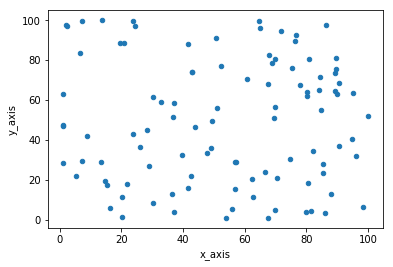

In [150]:
data.plot.scatter('x_axis','y_axis')

In [161]:
engine = KMeans(5)
engine.fit(data,10)

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))